# ETL: автоматизация подготовки данных (семинары)
## Урок 2. Введение в подготовку данных для аналитиков. Таблицы фактов и таблицы измерений

### 1. Скачайте датасет fifаs2.сsv. Проанализируйте его и определите, какие данные являются неполными. Удалите ненужные колонки и недостающие значения.

### 2. Найдите в датафрейме полные дубликаты и удалите их. Значения могут быть одинаковыми, но написаны по-разному. Например, может отличаться размер регистра (заглавные и строчные буквы). Особое внимание уделить колонке с названиями команд.

### 3. Напишите функцию, которая добавит колонку с разбиением возраста по группам: до 20, от 20 до 30, от 30 до 36 и старше 36. Посчитайте количество футболистов в каждой категории.

###  Подключаем библиотеки и делаем настройки

In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
import  matplotlib.pyplot as plt
import  matplotlib

plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)
pd.options.mode.chained_assignment = None

### Создаём датасет

In [104]:
df = pd.read_csv('/data/notebook_files/fifa_s2.csv', encoding='latin-1')

### Анализируем полученый датасет

In [105]:
df.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000.0,77,Right,4.0,1.0,GK,2018,01/01/2019,6.333333,203.0,7400.0
1,5479,Casillas,37,Spain,82,82,FC Porto,1500.0,10,Left,4.0,1.0,NaN,2015,01/01/2019,6.083333,185.0,3000.0
2,8205,Braga,35,Portugal,70,70,CD Aves,750.0,5,Right,1.0,3.0,LCM,2017,01/01/2019,5.916667,165.0,1600.0
3,9014,A. Robben,34,Netherlands,84,84,FC Bayern MÃ¼nchen,15500.0,110,Left,4.0,4.0,RM,2009,01/01/2019,5.916667,176.0,25600.0
4,19521,J. Ibehre,35,England,61,61,Cambridge United,120.0,2,Right,1.0,2.0,ST,2017,01/01/2019,6.333333,203.0,210.0
5,20209,Ricardo Costa,37,Portugal,74,74,CD Tondela,750.0,4,Right,2.0,2.0,LCB,2017,01/01/2019,6.000000,181.0,1600.0
6,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405,Right,5.0,5.0,ST,2018,01/01/2022,6.166667,183.0,127100.0
7,24630,Pepe Reina,35,Spain,83,83,Milan,6000.0,56,Right,3.0,1.0,GK,2018,NaN,6.166667,203.0,10200.0
8,27532,D. de Vries,37,Netherlands,66,66,Celtic,40.0,7,Right,1.0,1.0,GK,2016,01/01/2019,6.250000,212.0,72.0
9,45083,S. von Bergen,35,Switzerland,73,73,BSC Young Boys,950.0,12,Right,2.0,2.0,LCB,2013,01/01/2022,6.000000,174.0,1400.0


In [106]:
df.shape

(2399, 18)

In [107]:
df.dtypes

ID int64
Name object
Age int64
Nationality object
Overall int64
Potential int64
Club object
Value float64
Wage int64
Preferred Foot object
International Reputation float64
Skill Moves float64
Position object
Joined int64
Contract Valid Until object
Height float64
Weight float64
Release Clause float64
dtype: object

In [108]:
df.isnull().sum()

ID 0
Name 0
Age 0
Nationality 7
Overall 0
Potential 0
Club 241
Value 257
Wage 0
Preferred Foot 0
International Reputation 10
Skill Moves 6
Position 21
Joined 0
Contract Valid Until 273
Height 0
Weight 0
Release Clause 3
dtype: int64

<Axes: >

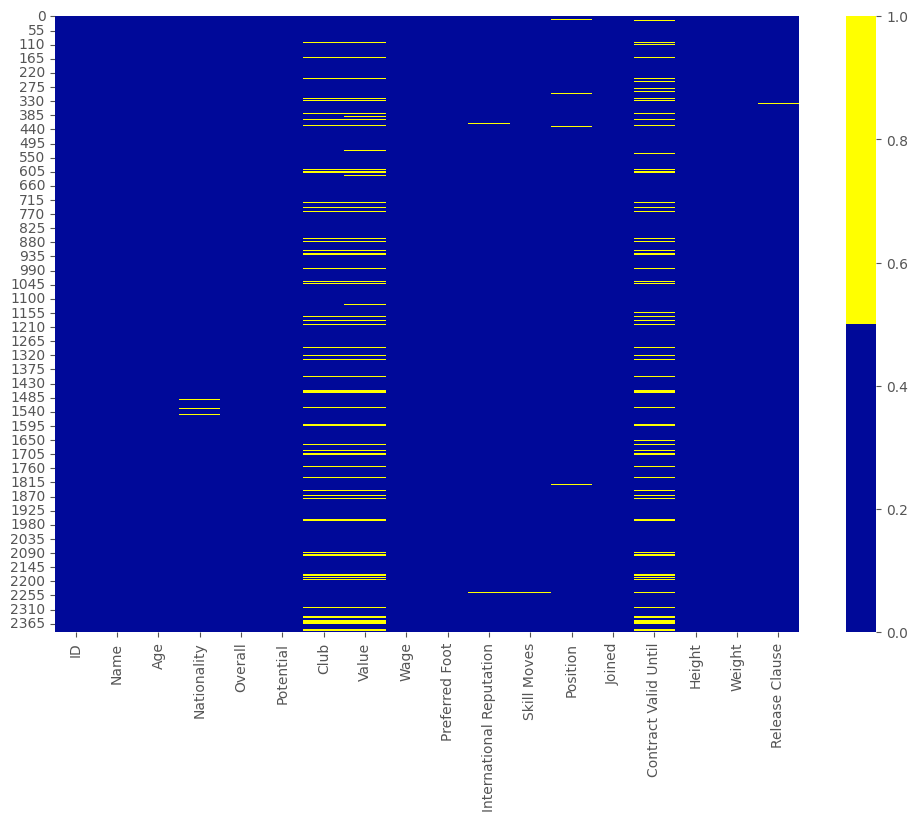

In [109]:
cols = df.columns
colors = ['#000999', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

In [110]:
for col in df.columns:
    missing_values = np.mean(df[col].isnull())
    print(f"{col} - {round(missing_values*100)}%")

ID - 0%
Name - 0%
Age - 0%
Nationality - 0%
Overall - 0%
Potential - 0%
Club - 10%
Value - 11%
Wage - 0%
Preferred Foot - 0%
International Reputation - 0%
Skill Moves - 0%
Position - 1%
Joined - 0%
Contract Valid Until - 11%
Height - 0%
Weight - 0%
Release Clause - 0%


### Видим, что больше всего пропусков в столбцах Club, Value и Contract Valid Until. В столбец Contract Valid Until помимо пропусков, записанна дата в нечитаемом формате, будем считать, что такие данные нам не нужны и удалим этот столбец. Столбец Club оставим без измененний так как эти данные нам не сильно помешают. А пропуски в столбеце Value заполним мидианными значениями.

### Удаляем Contract Valid Until

In [111]:
df = df.drop('Contract Valid Until', axis=1)

### Пропуски в столбеце Value заполним мидианными значениями

In [112]:
df['Value'] = df['Value'].fillna(df['Value'].mean())

### Проверяем на отсутствие значений

In [113]:
df['Value'].isnull().sum()

0

### Создаём функцию для приведения строковых данных к единому образцу

In [114]:
def convert_to_upper(column_name):
    if df[column_name].dtypes == 'object':
        df[column_name] = df[column_name].str.capitalize()

### Применяем функцию на весь датафрейм

In [115]:
for i in df:
    convert_to_upper(i)

In [116]:
df.shape

(2399, 17)

### Удаляем дубликаты

In [117]:
df = df.drop_duplicates(inplace=False, keep='first')

In [118]:
df.shape

(2397, 17)

## функция, которая добавит колонку с разбиением возраста по группам: до 20, от 20 до 30, от 30 до 36 и старше 36

In [119]:
def age(row):
    if row['Age'] < 20:
        return 'young'
    elif row['Age'] < 30:
        return 'middle'
    elif row['Age'] <= 36:
        return 'old'
    else :
        return 'very old'



df['Age group'] = df.apply (age, axis=1)

In [120]:
df.head(15)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Height,Weight,Release Clause,Age group
0,1179,G. buffon,40,Italy,88,88,Paris saint-germain,4000.0,77,Right,4.0,1.0,Gk,2018,6.333333,203.0,7400.0,very old
1,5479,Casillas,37,Spain,82,82,Fc porto,1500.0,10,Left,4.0,1.0,NaN,2015,6.083333,185.0,3000.0,very old
2,8205,Braga,35,Portugal,70,70,Cd aves,750.0,5,Right,1.0,3.0,Lcm,2017,5.916667,165.0,1600.0,old
3,9014,A. robben,34,Netherlands,84,84,Fc bayern mã¼nchen,15500.0,110,Left,4.0,4.0,Rm,2009,5.916667,176.0,25600.0,old
4,19521,J. ibehre,35,England,61,61,Cambridge united,120.0,2,Right,1.0,2.0,St,2017,6.333333,203.0,210.0,old
5,20209,Ricardo costa,37,Portugal,74,74,Cd tondela,750.0,4,Right,2.0,2.0,Lcb,2017,6.000000,181.0,1600.0,very old
6,20801,Cristiano ronaldo,33,Portugal,94,94,Juventus,77000.0,405,Right,5.0,5.0,St,2018,6.166667,183.0,127100.0,old
7,24630,Pepe reina,35,Spain,83,83,Milan,6000.0,56,Right,3.0,1.0,Gk,2018,6.166667,203.0,10200.0,old
8,27532,D. de vries,37,Netherlands,66,66,Celtic,40.0,7,Right,1.0,1.0,Gk,2016,6.250000,212.0,72.0,very old
9,45083,S. von bergen,35,Switzerland,73,73,Bsc young boys,950.0,12,Right,2.0,2.0,Lcb,2013,6.000000,174.0,1400.0,old


## Считаем количество футболистов по группам

In [121]:
df.groupby(['Age group']).size()

Age group
middle 1646
old 466
very old 15
young 270
dtype: int64